In [53]:
%load_ext autoreload
%autoreload 2

from collections import OrderedDict
import json
import sys
sys.path.append('src')

import numpy as np
from sklearn.cluster import KMeans

from bridge_base_new import Bridge, Support, ZkLoad
#from bridge import Bridge_64, Bridge_160

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ËÆ°ÁÆó

### ËæìÂÖ•ÂèÇÊï∞

In [98]:
# Â∏∏Èáè
E = 21 * 10**10           # Êù®Ê∞èÊ®°Èáè (Pa)
P = 1                     # Â§ñÂäõ    (kN)
h = 2.52                  # ÊÅíËΩΩ    (kN)
bottom_chord_length = 8.   # ‰∏ãÂº¶ÊùÜÈïøÂ∫¶/‰∏ãËäÇÁÇπÈó¥Ë∑ù (m)
bridge_len = 160
path = './data'

zk_load = ZkLoad(uniform_len=80)
bridge = Bridge(bridge_len)

### ËØªÂÖ•Êï∞ÊçÆ

In [99]:
# ËØªÂÖ•ËäÇÁÇπÊï∞ÊçÆ => ËØªÂÖ•ÊùÜ‰ª∂Êï∞ÊçÆ => ËØªÂÖ•ÂèÇÊï∞
bridge.load_nodes_data(path)
bridge.load_units_data(path)
bridge.load_params(E=E, 
                   P=P, 
                   h=h, 
                   bottom_chord_length=bottom_chord_length, 
                   load=zk_load)

In [100]:
# ÂØºÂÖ•Êà™Èù¢ÂèÇÊï∞
# ‰ªéÊñá‰ª∂ÂØºÂÖ•
bridge.load_section_params(path)

# ÊâãÂä®ÂØºÂÖ• (Âú®Ê£ÄÁÆó‰∏≠‰ΩøÁî®)
# b1, t1, b2, t2 = 0.215, 0.012, 0.436, 0.010
#bridge.set_section_params()

### Ê∑ªÂä†ÊîØÂ∫ß

In [101]:
# Ê∑ªÂä†ÊîØÂ∫ß

bridge.set_supports([Support(1, h=False, v=True),
                     Support(21, h=True, v=True),
                     Support(40, h=False, v=True)])

### ÊÄª‰ΩìÂàöÂ∫¶Áü©Èòµ

In [8]:
bridge.K

array([[ 9.951e+08,  3.966e+08, -2.884e+08, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 3.966e+08,  5.453e+08, -3.966e+08, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-2.884e+08, -3.966e+08,  1.556e+09, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       ...,
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  5.139e+08,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  8.504e+08,
        -1.977e+08],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00, -1.977e+08,
         2.718e+08]])

### ÂçïÂÖÉÂàöÂ∫¶Áü©Èòµ

In [9]:
for unit in bridge.units.values():
    print('ÂçïÂÖÉ %d\n%s' % (unit.num, unit.kij))

ÂçïÂÖÉ 1
[[ 2.884e+08  3.966e+08 -2.884e+08 -3.966e+08]
 [ 3.966e+08  5.453e+08 -3.966e+08 -5.453e+08]
 [-2.884e+08 -3.966e+08  2.884e+08  3.966e+08]
 [-3.966e+08 -5.453e+08  3.966e+08  5.453e+08]]
ÂçïÂÖÉ 2
[[ 7.067e+08  0.000e+00 -7.067e+08 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00 -0.000e+00]
 [-7.067e+08 -0.000e+00  7.067e+08  0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00  0.000e+00]]
ÂçïÂÖÉ 3
[[ 9.434e-24  1.541e-07 -9.434e-24 -1.541e-07]
 [ 1.541e-07  2.516e+09 -1.541e-07 -2.516e+09]
 [-9.434e-24 -1.541e-07  9.434e-24  1.541e-07]
 [-1.541e-07 -2.516e+09  1.541e-07  2.516e+09]]
ÂçïÂÖÉ 4
[[ 1.124e+09  0.000e+00 -1.124e+09 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00 -0.000e+00]
 [-1.124e+09 -0.000e+00  1.124e+09  0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00  0.000e+00]]
ÂçïÂÖÉ 5
[[ 1.438e+08 -1.977e+08 -1.438e+08  1.977e+08]
 [-1.977e+08  2.718e+08  1.977e+08 -2.718e+08]
 [-1.438e+08  1.977e+08  1.438e+08 -1.977e+08]
 [ 1.977e+08 -2.718e+08 -1.977e+08  2.718e+08]]
ÂçïÂÖÉ 6
[

### ËäÇÁÇπÁ´ñÂêë‰ΩçÁßª‰∏éÂΩ±ÂìçÁ∫ø

In [74]:
bridge.get_nodes_vdisps()

ÊâÄÊúâËäÇÁÇπÁ´ñÂêë‰ΩçÁßªÂ∑≤ËÆ°ÁÆóÂÆåÊØï.


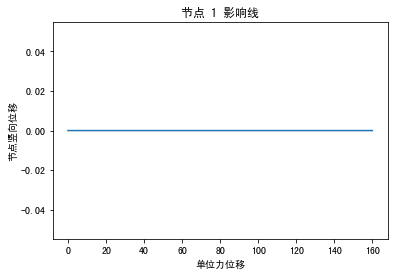

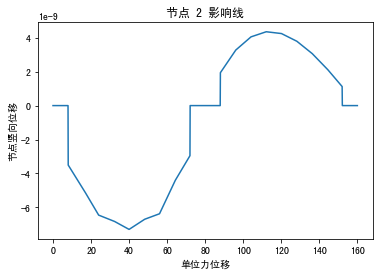

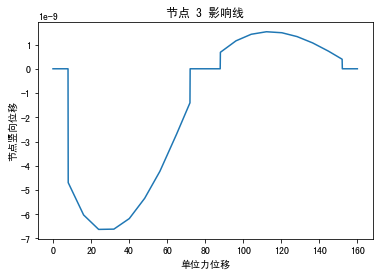

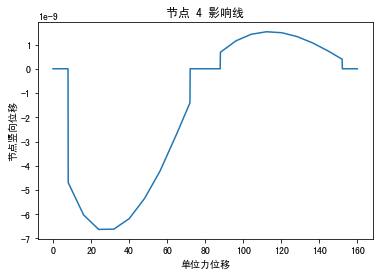

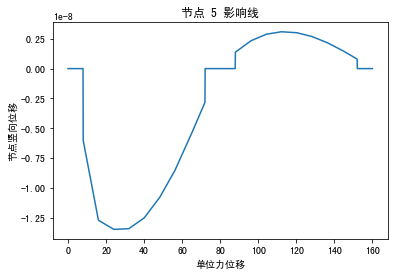

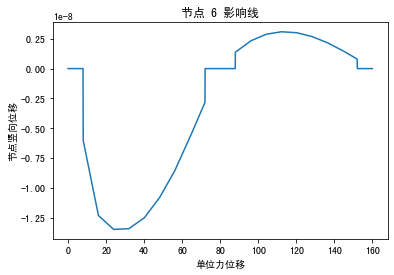

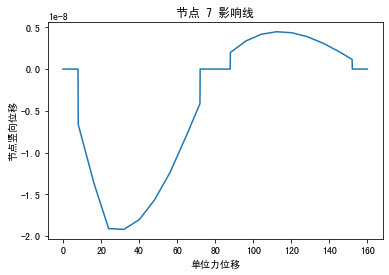

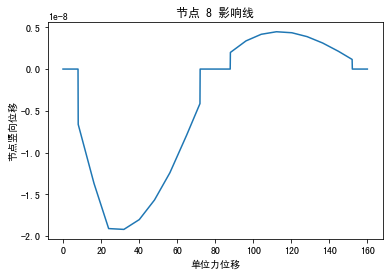

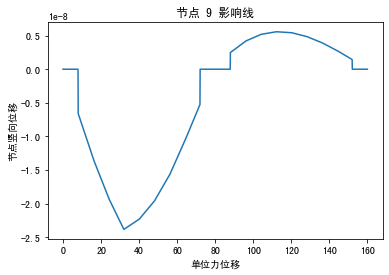

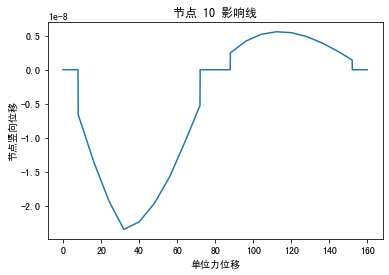

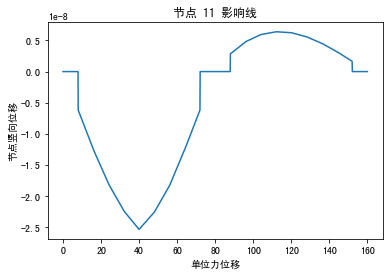

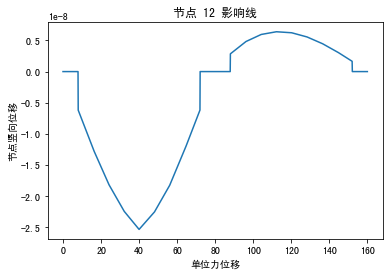

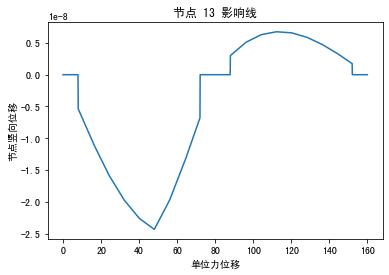

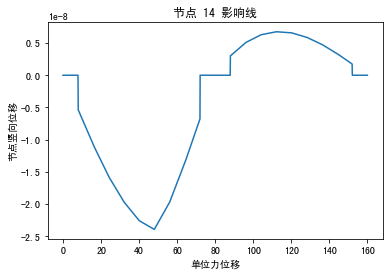

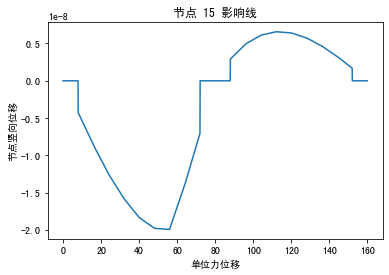

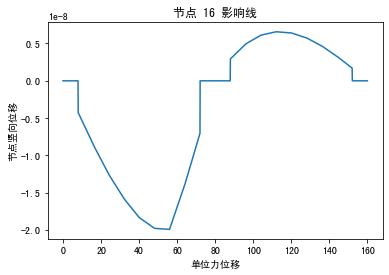

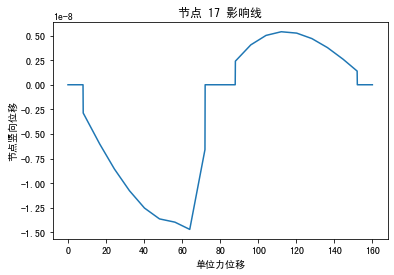

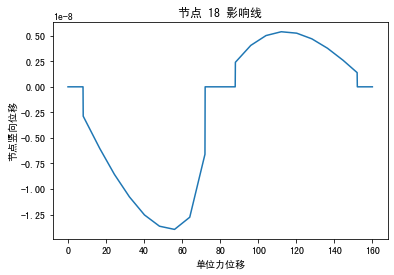

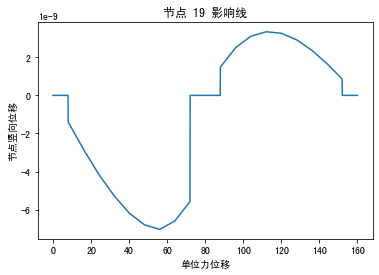

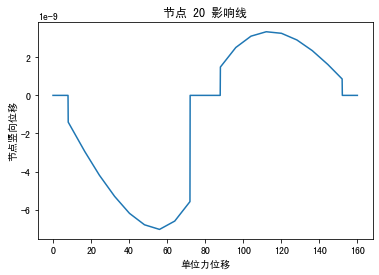

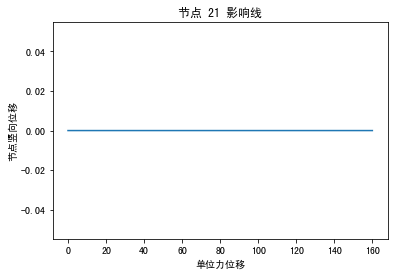

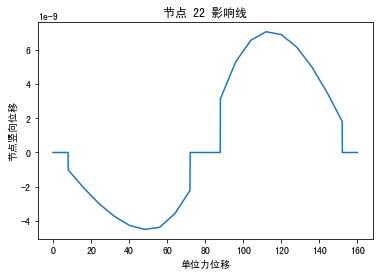

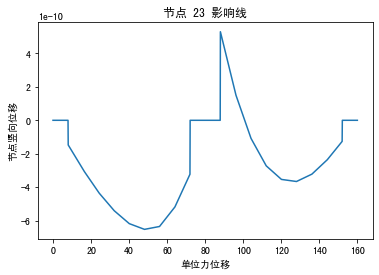

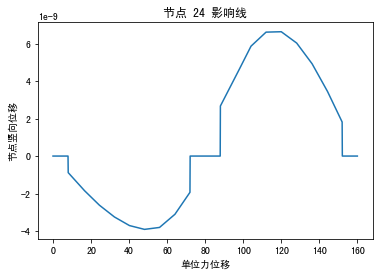

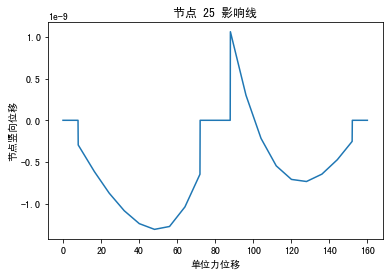

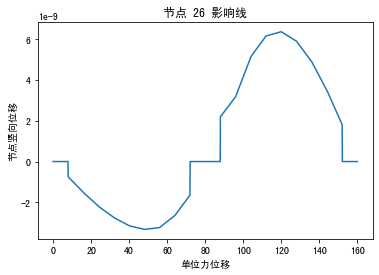

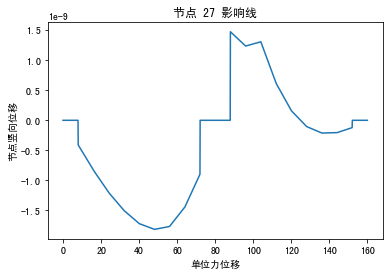

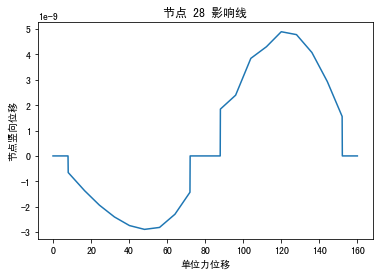

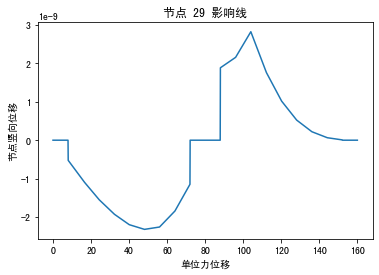

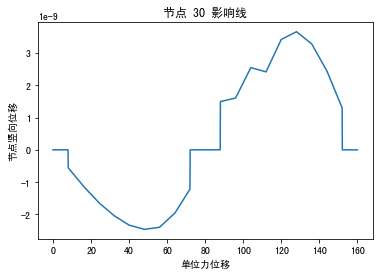

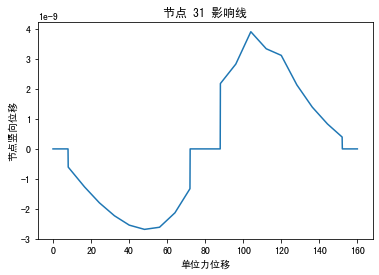

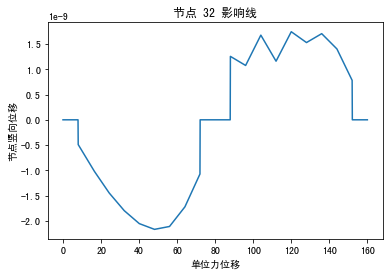

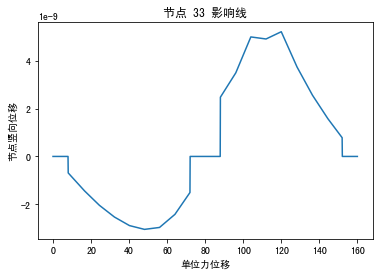

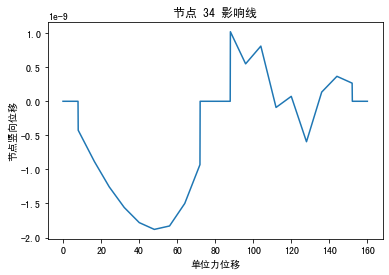

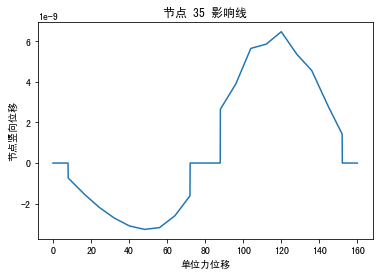

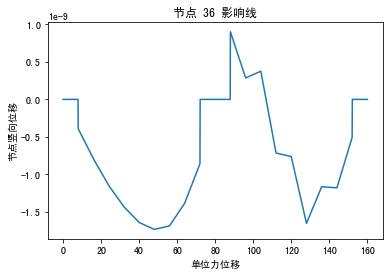

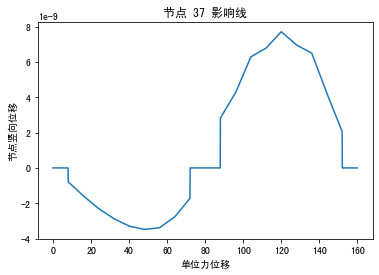

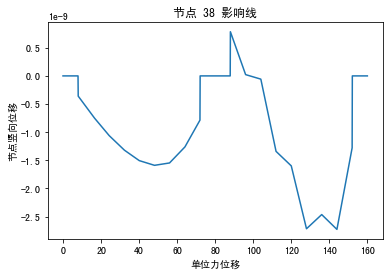

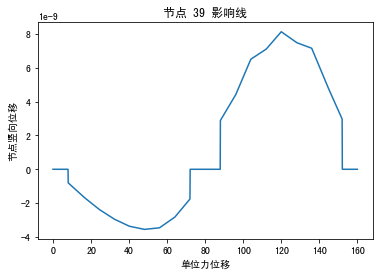

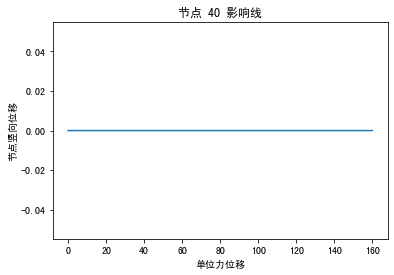

In [75]:
bridge.show_nodes_vdisps()

### ËΩ¥Âäõ‰∏éÂΩ±ÂìçÁ∫ø

In [93]:
bridge.get_units_axial_forces()

ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉËΩ¥ÂäõÂ∑≤ËÆ°ÁÆóÂÆåÊØï.
ÊâÄÊúâÈõ∂ÊùÜÂ∑≤Ê†áËØÜ.


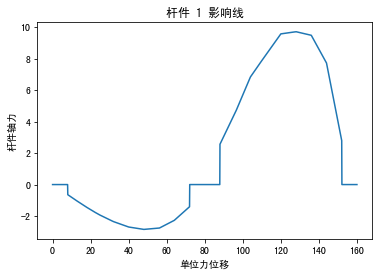

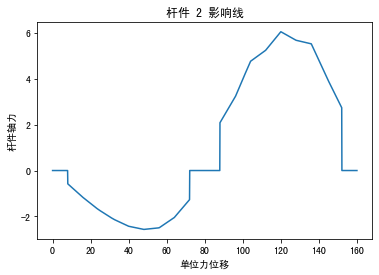

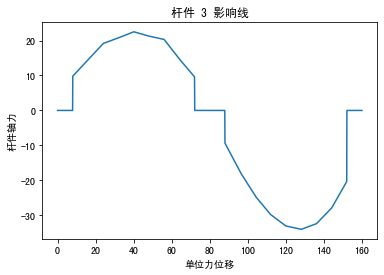

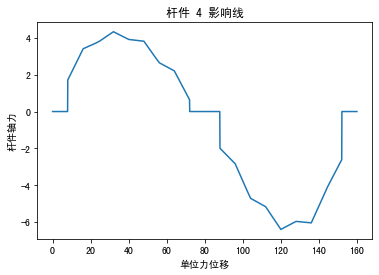

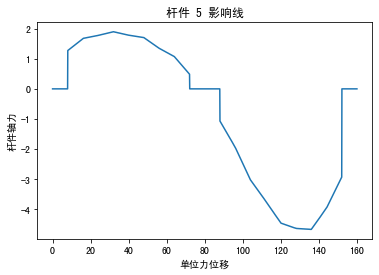

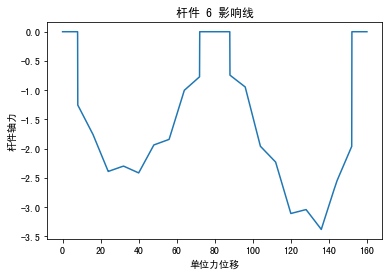

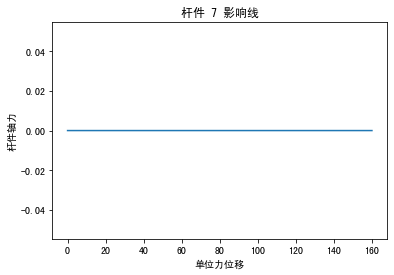

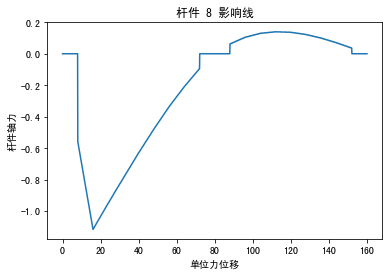

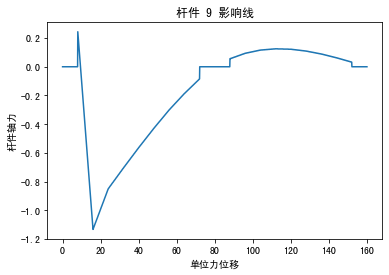

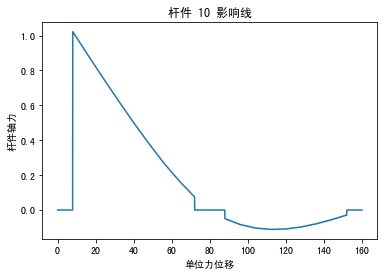

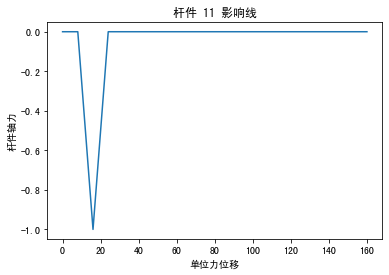

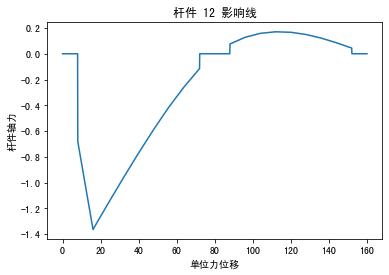

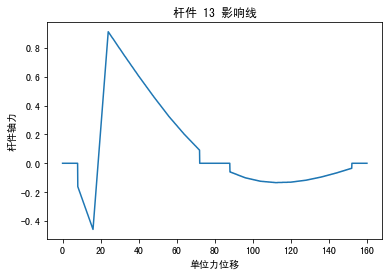

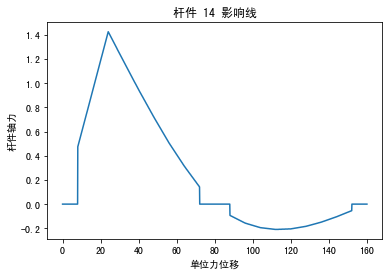

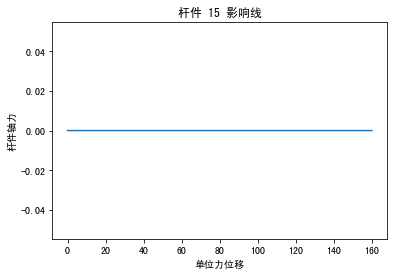

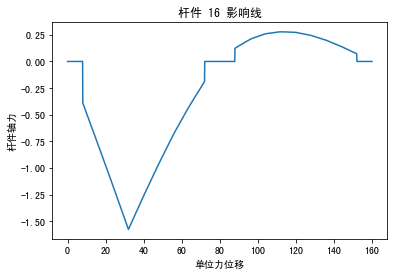

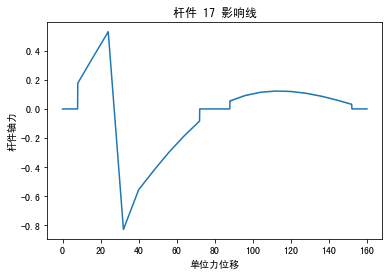

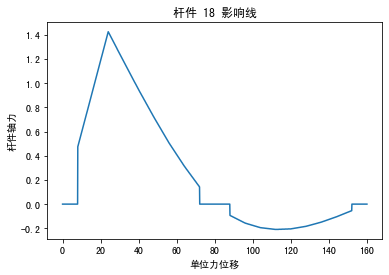

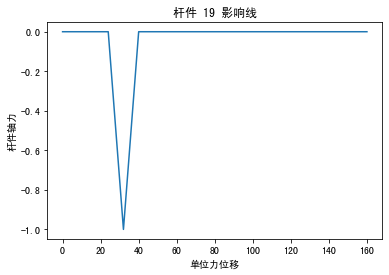

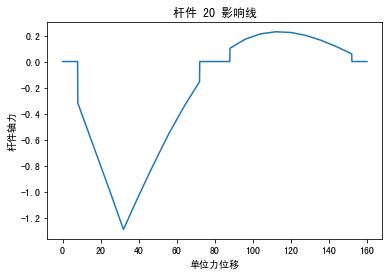

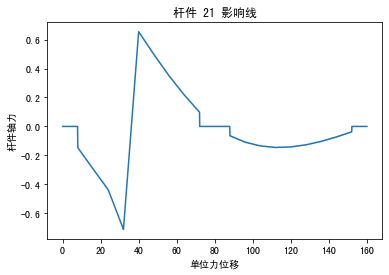

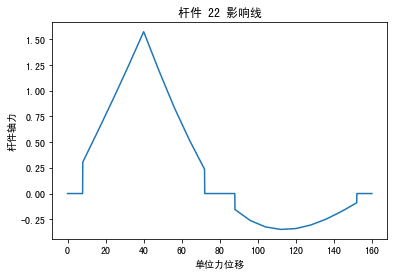

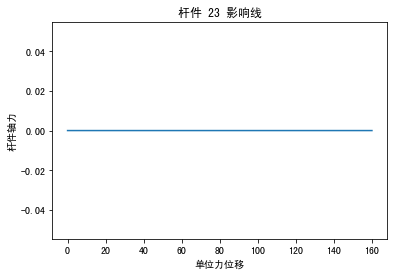

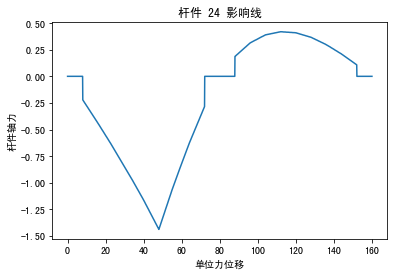

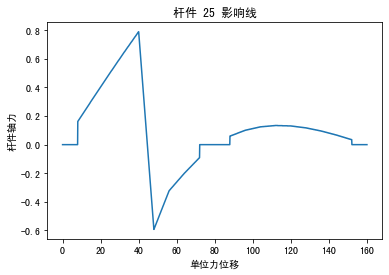

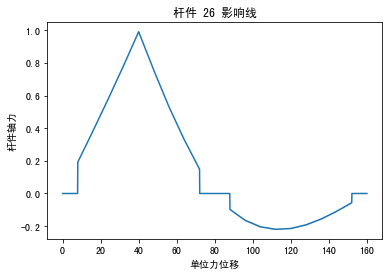

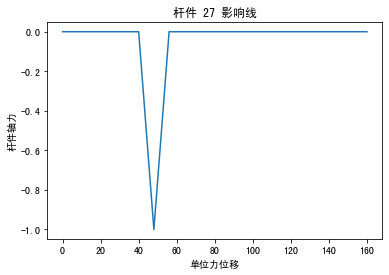

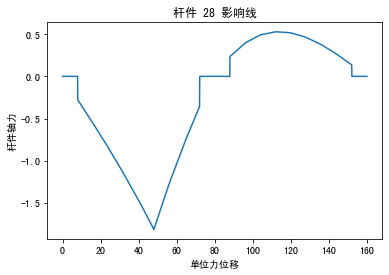

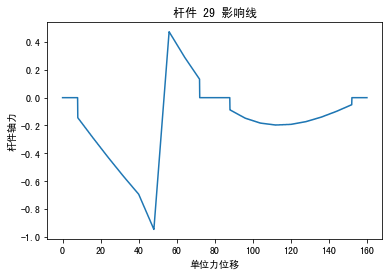

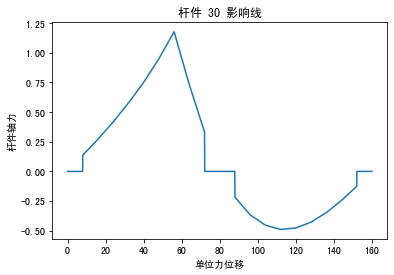

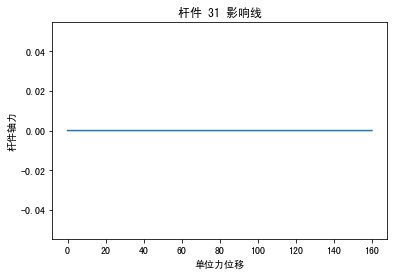

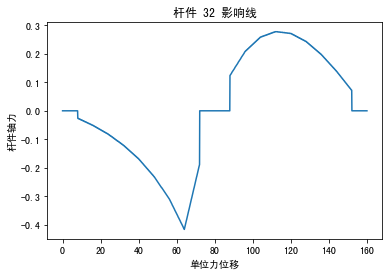

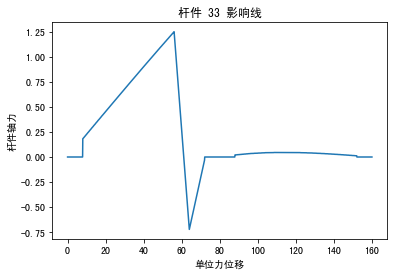

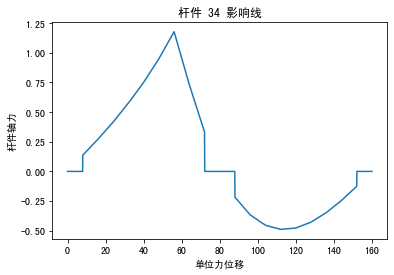

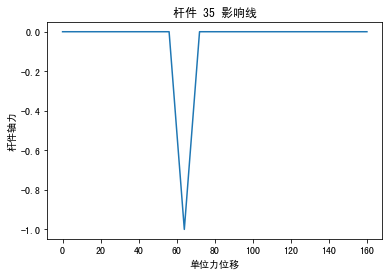

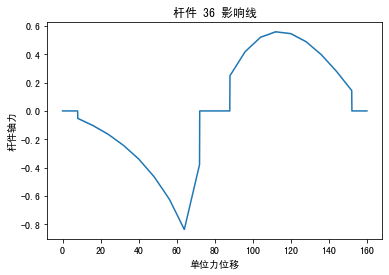

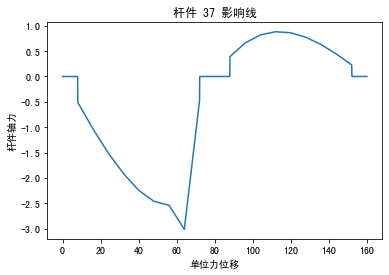

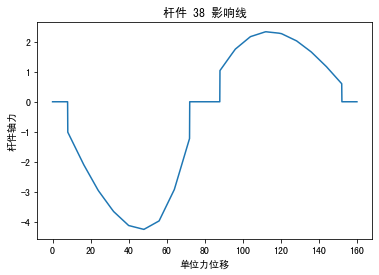

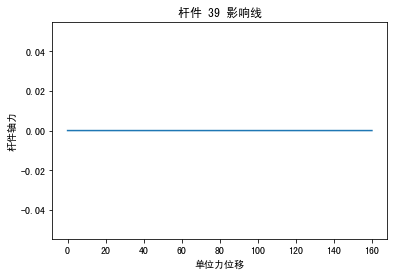

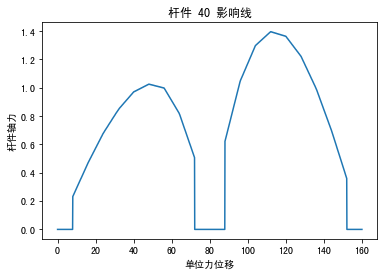

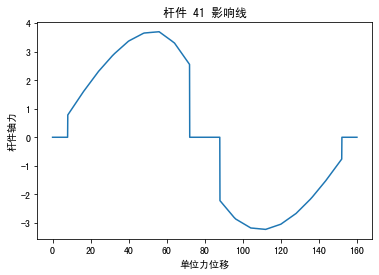

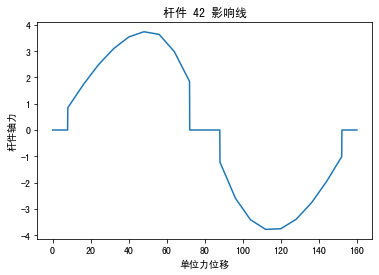

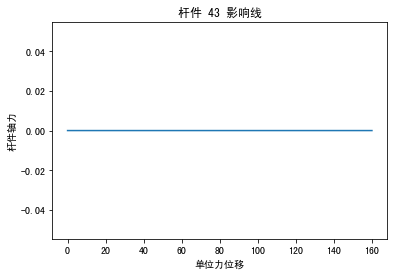

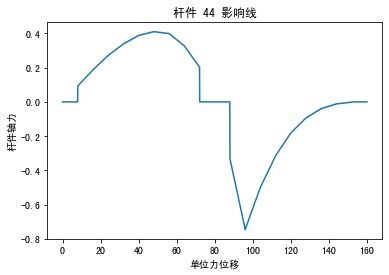

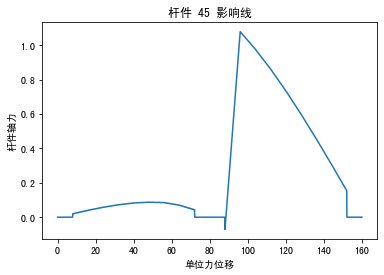

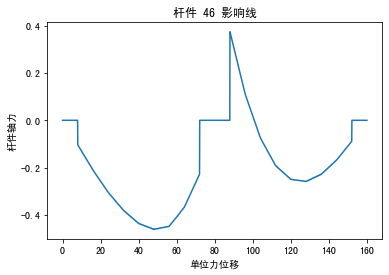

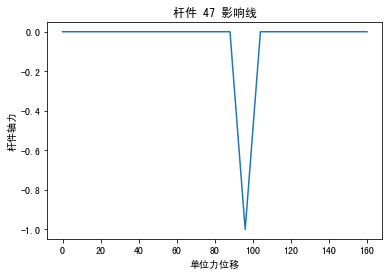

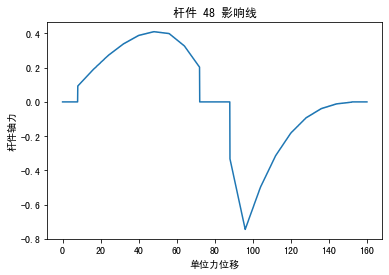

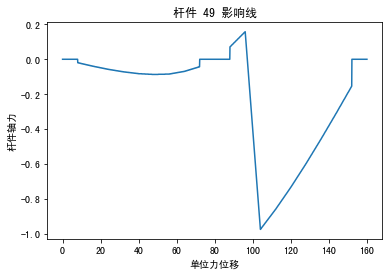

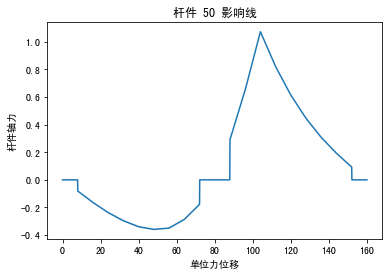

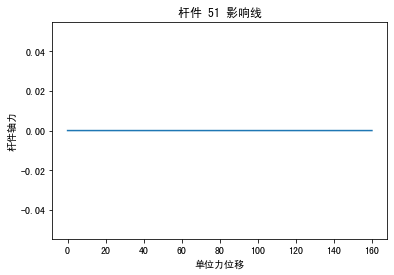

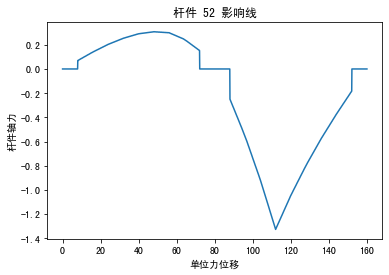

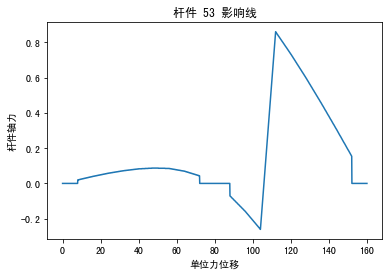

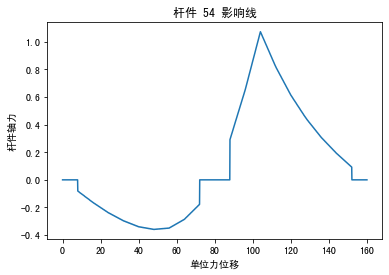

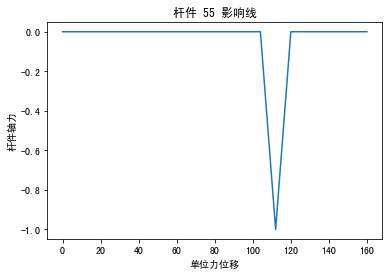

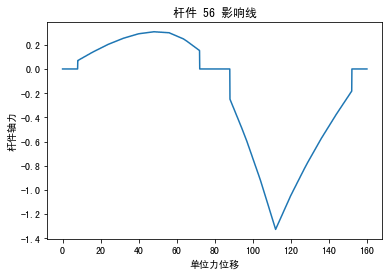

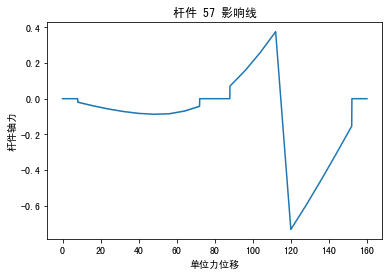

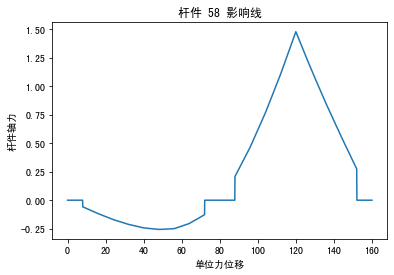

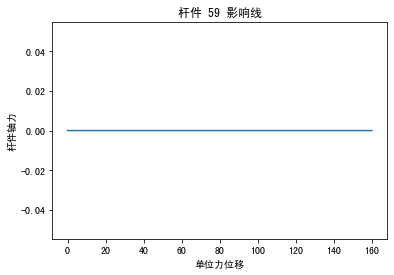

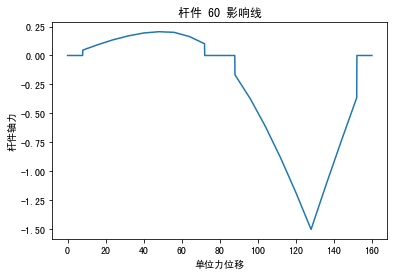

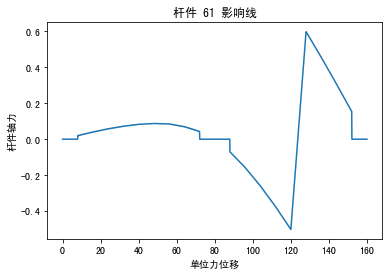

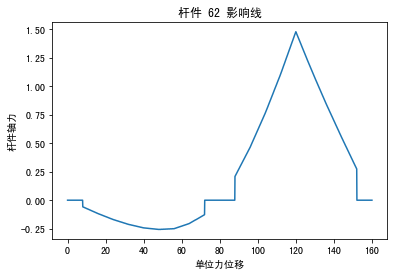

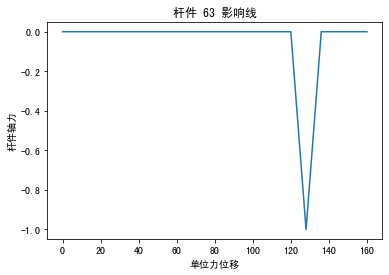

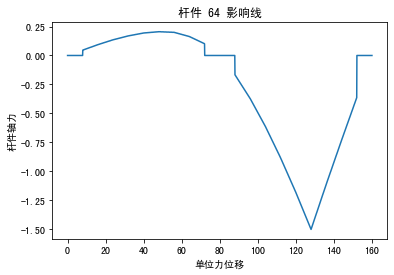

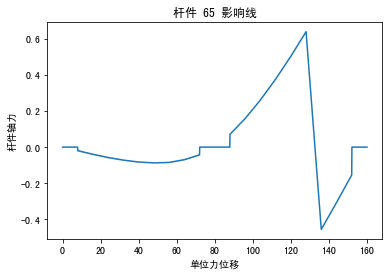

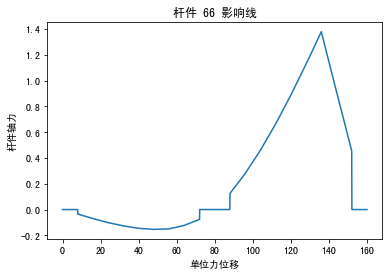

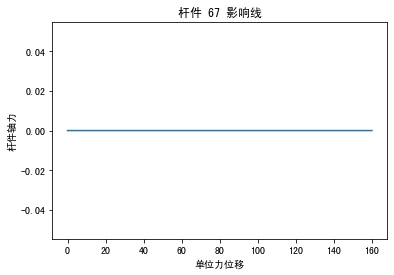

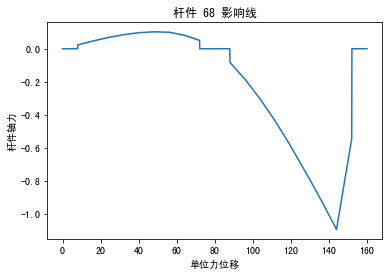

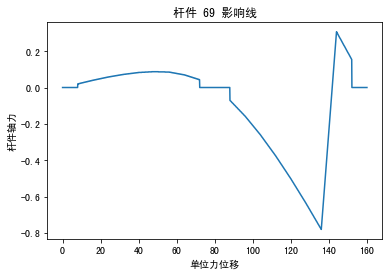

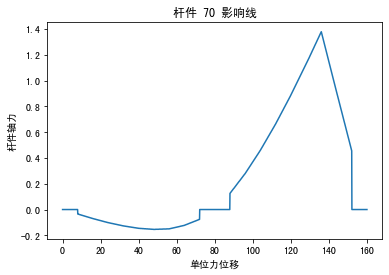

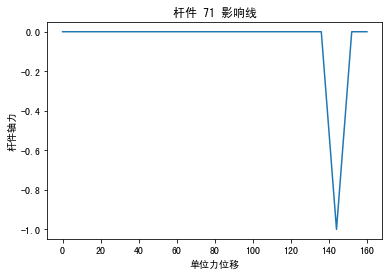

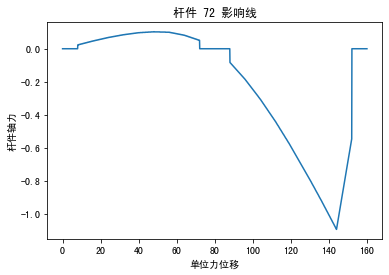

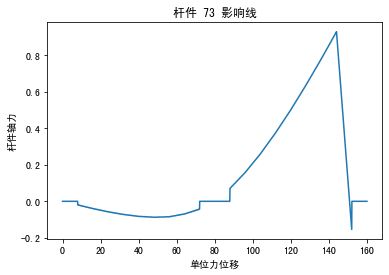

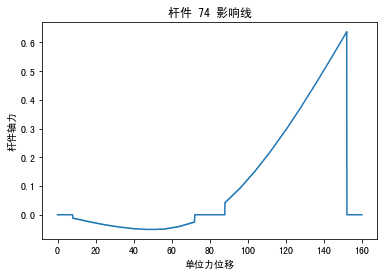

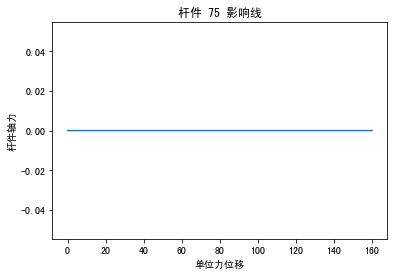

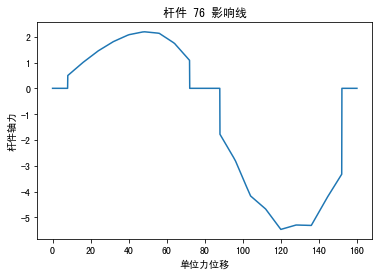

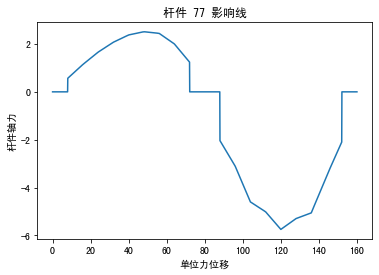

In [94]:
# ËΩ¥ÂäõÂΩ±ÂìçÁ∫ø
bridge.show_units_axial_forces()

In [14]:
# Á´ñÊùÜ
bridge.vertical_units

[3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63, 67, 71, 75]

## Ê£ÄÁÆó

### ÂàùÂßãÂåñÊà™Èù¢ÂèÇÊï∞

In [102]:
# Ê¢ÅÊà™Èù¢Êï∞ÊçÆ([ËÖπÊùøÂÆΩÂ∫¶ ÁøºÁºòÂéöÂ∫¶ ËÖπÊùøÂéöÂ∫¶ ÁøºÁºòÂÆΩÂ∫¶])
#             b2       t1      t2     b1
b1, t1, b2, t2 = [0.215, 0.012, 0.436, 0.010]
section_params = [b2, t1, t2, b1]

# ËÆæÁΩÆÊà™Èù¢ÂèÇÊï∞
bridge.set_section_params(bridge.units_nums, section_params)
bridge.update()

ÊâÄÊúâÂçïÂÖÉ [ÂçïÂÖÉÂàöÂ∫¶Áü©Èòµ] Â∑≤ÈáçÊñ∞ËÆ°ÁÆó.
ÊâÄÊúâÂçïÂÖÉ [ÊØõÈù¢ÁßØ] Â∑≤ÈáçÊñ∞ËÆ°ÁÆó.
[ÊÄª‰ΩìÂàöÂ∫¶Áü©Èòµ] Â∑≤ÈáçÊñ∞ËÆ°ÁÆó.
[Áº©ÂáèÂàöÂ∫¶Áü©Èòµ] Â∑≤ÈáçÊñ∞ËÆ°ÁÆó.
ÊâÄÊúâËäÇÁÇπÁ´ñÂêë‰ΩçÁßªÂ∑≤ËÆ°ÁÆóÂÆåÊØï.
ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉËΩ¥ÂäõÂ∑≤ËÆ°ÁÆóÂÆåÊØï.
ÊâÄÊúâÈõ∂ÊùÜÂ∑≤Ê†áËØÜ.
ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉÊúÄ‰∏çÂà©Ëç∑ËΩΩÂ∑≤ËÆ°ÁÆóÂÆåÊØï.
ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉÊúÄ‰∏çÂà©‰ΩçÁßªÂ∑≤ËÆ°ÁÆóÂÆåÊØï.


### Ê†πÊçÆÊúÄÂ§ßÂÜÖÂäõNËÅöÁ±ª

In [103]:
# Ââç‰∏ÄÂçäËäÇÁÇπÁºñÂè∑
target_units_nums = list(range(1, 40))

# Ê†πÊçÆÊúÄÂ§ßÂÜÖÂäõNËÅöÁ±ª
units_clusters = bridge.get_units_clusters(target_units_nums, n_clusters=7)
units_clusters

OrderedDict([(0, [31, 32, 33, 34, 35, 36, 38]),
             (1, [7, 8, 9, 10, 11, 12, 13, 14]),
             (2, [4, 6]),
             (3, [23, 24, 25, 26, 27, 28, 29, 30, 37]),
             (4, [15, 16, 17, 18, 19, 20, 21, 22, 39]),
             (5, [2, 3]),
             (6, [1, 5])])

In [104]:
for label, units_cluster in units_clusters.items():
    print('Á±ªÂà´ %d' % label)
    for unit_num in units_cluster:
        print(unit_num, bridge.units[unit_num].N)
    print()

Á±ªÂà´ 0
31 [ -2610.349 -11817.483]
32 [ -2624.432 -12481.575]
33 [ -2869.29  -13366.253]
34 [ -2624.432 -12481.575]
35 [ -3439.157 -15721.02 ]
36 [ -3306.007 -15171.331]
38 [ -3306.007 -15171.331]

Á±ªÂà´ 1
7 [17378.017  3675.22 ]
8 [13922.979  2797.532]
9 [12652.66   2510.396]
10 [13922.979  2797.532]
11 [12148.455  2376.763]
12 [13247.439  2632.387]
13 [11790.786  2299.587]
14 [13247.439  2632.387]

Á±ªÂà´ 2
4 [45277.72   2713.067]
6 [44647.222   425.612]

Á±ªÂà´ 3
23 [ -713.95  -3338.837]
24 [ -339.728 -5458.895]
25 [-1217.586 -5748.698]
26 [ -339.728 -5458.895]
27 [-1646.41  -7407.395]
28 [-1473.569 -6745.348]
29 [-1762.688 -7863.609]
30 [-1473.569 -6745.348]
37 [ -812.889 -3794.258]

Á±ªÂà´ 4
15 [6997.25   832.802]
16 [5540.388 -517.563]
17 [4073.167 -652.215]
18 [5540.388 -517.563]
19 [2698.218 -864.732]
20 [3753.235 -740.601]
21 [2269.937 -913.186]
22 [3753.235 -740.601]
39 [2.52 2.52]

Á±ªÂà´ 5
2 [ 11320.27 -26137.4 ]
3 [ 10866.242 -17365.557]

Á±ªÂà´ 6
1 [18797.356 -4728.483]

In [ ]:
'''
clusters == OrderedDict(
    [(0, [10, 14, 18, 22, 26, 30, 33, 36]),
     (1, [38]),
     (2, [3, 7, 11, 15, 19, 23, 27, 31, 35, 39]),
     (3, [12, 16, 20, 24]),
     (4, [2, 5, 6, 13, 17, 25, 28, 32]),
     (5, [37]),
     (6, [1, 4, 8, 9, 21, 29, 34])]
)
'''
# Ë°•ÂÖÖÂâ©‰ΩôËäÇÁÇπÁºñÂè∑
units_clusters[0] += [40, 45, 50, 54, 58, 62, 66, 70]
units_clusters[1] += [42]
units_clusters[2] += [43, 47, 51, 55, 59, 63, 67, 71, 75]
units_clusters[3] += [52, 56, 60, 64]
units_clusters[4] += [46, 49, 57, 68, 69, 72, 76]
units_clusters[5] += [41]
units_clusters[6] += [44, 48, 53, 61, 65, 73, 74, 77]

for i, cluster in units_clusters.items():
    print(i, cluster)

### ‰øùÂ≠òÊùÜ‰ª∂ËÅöÁ±ªÊï∞ÊçÆ

In [ ]:
with open('units_clusters.json', 'w') as units_clusters_file:                                
    json.dump(units_clusters, units_clusters_file)

### ËØªÂèñÊùÜ‰ª∂ËÅöÁ±ªÊï∞ÊçÆ

In [ ]:
# units_clusters = bridge.load_units_clusters(path)

### ÂàõÂª∫Ê£ÄÁÆóÂô®

In [ ]:
bridge.check()
checker = Checker(bridge)

### Ë∞ÉËäÇÊà™Èù¢ÂèÇÊï∞

In [ ]:
# b = 2 * t1 + b2 = 0.46
# h = 2 * b1 + t2 = 0.76
B = {
    '0':  0.46, 
    '1':  0.46, 
    '2':  0.46, 
    '3':  0.46,
    '4':  0.46, 
    '5':  0.46, 
    '6':  0.46
}

T1 = {
    '0':  0.022,  
    '1':  0.022,  
    '2':  0.022, 
    '3':  0.022,
    '4':  0.022, 
    '5':  0.022, 
    '6':  0.022 
}


H = {
    '0':  0.60,  
    '1':  0.76,  
    '2':  0.44, 
    '3':  0.44,
    '4':  0.76, 
    '5':  0.60, 
    '6':  0.60 
}


T2 = {
    '0':  0.022,  
    '1':  0.022,  
    '2':  0.022, 
    '3':  0.022,
    '4':  0.022, 
    '5':  0.022, 
    '6':  0.022 
}

In [ ]:
for label, units_cluster in units_clusters.items():
    # ÊØè‰∏ÄÁ±ªÁöÑÂèÇÊï∞
    b, t1 = B[label], T1[label]
    b2 = b - 2 * t1
    
    h, t2 = H[label], T2[label]
    b1 = (h - t2) / 2
    
    section_params = [b2, t1, t2, b1]
    bridge.set_section_params(units_cluster, section_params)          

bridge.update()

### Ê£ÄÁÆóÊâÄÊúâÊùÜ‰ª∂

In [ ]:
checker.check_all()

### ÂçïÁã¨ËøõË°åÊüêÁßçÁ±ªÂûãÊ£ÄÁÆó

### ÊµãËØïüëá

In [38]:
np.array([1, 2])

array([1, 2])

In [49]:
def a():
    x = 1
    b()
    c()
    print(x)
def b():
    global x
    x += 1
def c():
    global x
    x += 1

In [50]:
a()

NameError: name 'x' is not defined